In [1]:
from functions import *

In [11]:
n = 5
m = RandomIsingModel(n, seed=0)
print(m)

Ising model information:
Number of spins: 5
External fields (h): [1.76405235 0.40015721 0.97873798 2.2408932  1.86755799]
Interaction matrix (J):
[[ 0.          0.40015721  0.97873798  2.2408932   1.86755799]
 [ 0.40015721  0.         -0.15135721 -0.10321885  0.4105985 ]
 [ 0.97873798 -0.15135721  0.          0.12167502  0.44386323]
 [ 2.2408932  -0.10321885  0.12167502  0.         -0.85409574]
 [ 1.86755799  0.4105985   0.44386323 -0.85409574  0.        ]]
Alpha: 0.46116561182416654
Ground state energy: -12.606210061400086
Ground state: |00000> = |0>
Ground state degeneracy: 1



In [3]:
# TODO: What does the proposal probability actually mean? How is it related to the perturbative analysis? Does it have anything to do with how common the energy eigenvalue is?

n_frames = 50
video_gammas = np.zeros((n_frames, 2**n, 2**n))
gammas = np.linspace(0.2,0.9,n_frames)
for gamma_index in range(n_frames):
    gamma = gammas[gamma_index]
    video_gammas[gamma_index] = get_proposal_mat_quantum(m, gamma=gamma, t=10)

In [4]:
n_frames = 50
video_times = np.zeros((n_frames, 2**n, 2**n))
times = np.linspace(2,50,n_frames)
for time_index in range(n_frames):
    t = times[time_index]
    video_times[time_index] = get_proposal_mat_quantum(m, gamma=0.5, t=t)

In [5]:
# proposal_mat_quantum = get_proposal_mat_quantum(m)
# plt.imshow(proposal_mat_quantum,)

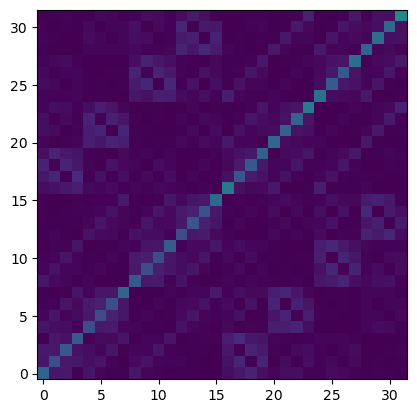

In [6]:
display_video(video_gammas)

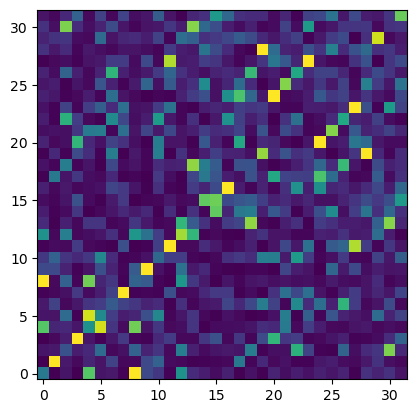

In [7]:
display_video(video_times)

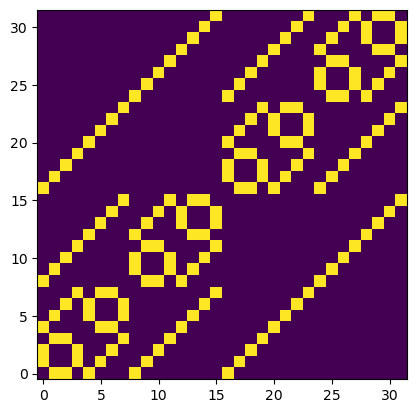

In [8]:
proposal_mat_local = get_proposal_mat_local(m, hamming_radius=1)
plt.imshow(proposal_mat_local,  interpolation='nearest', origin='lower')

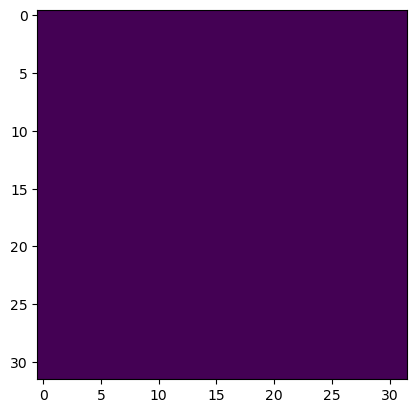

In [9]:
proposal_mat_random = get_proposal_mat_random(m)
plt.imshow(proposal_mat_random,  interpolation='nearest')